<a href="https://colab.research.google.com/github/GuilhermeDeAssis123/DataScience/blob/master/Projeto_DataScience(An%C3%A1lise%20da%20viol%C3%AAncia%20no%20RJ).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analisando o índice de violência no Rio de Janeiro

>Nós brasileiros sabemos que a cidade do Rio de janeiro é uma das cidades mais violentas do Brasil na qual muitas vezes chega a ser necessário as forças armadas(no caso o Exército e fuzileiros navais) para intervir nas operções,assim se tratando de um grande problema quando o assunto é violência. No ano de 2018 foram contabilizados cerca de 4200 homicidios em um periodo de janeiro a outubro no estado. Porém no mesmo periodo de 2019 houve uma queda de 21% nesse número, caindo para cerca de 3300 vítimas. Nesse relatório vamos análisar a violência em três aspectos, sendo eles os roubos em transportes coletivos, roubos e furtos de veiculos e homicidios dolosos, com o intuito de confirmar nossa hipótese ao final desse relatório de que o estado do Rio de Janeiro é violento.

<center><img src="https://www.redebrasilatual.com.br/wp-content/uploads/2018/02/80975235-ad6e-4695-af73-5db56b57ff6d.jpeg"/></center>

---

#Obtenção dos Dados

> Os dados foram obtidos através do instituo de segurança publica do estado do Rio de Janeiro, sendo analisado os dados de 1991 ate 2019, caso queira verificar os dados clique [aqui](http://www.ispdados.rj.gov.br/estatistica.html). Por ser um DataSet público possivelmente existem muitos valores nulos e serão necessárias algumas operções no conjunto de dados para que ele fique em condição apresentável sem que haja a presença de valores que induzam a análise a caminhos traiçoeiros.
<center><img width = "60%"src="https://miro.medium.com/max/2400/0*NuUDCjzgHJJiOLbz"/></center> 

> Agora vamos começar a olhar um pouco mais de perto para o nosso DataSet, mas antes de começar a análisar os dados, vamos corrigir o que for necessário. Vamos importa-lo e verificar sua forma.

In [0]:
#importando bibliotecas necessárias e o nosso DataSet.
import pandas as pd
import seaborn as sea
df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_02/violencia_rio.csv")



---

#Análisando os Dados

>Agora que ja temos o nosso DataSet disponível vamos começar a extrair informações inciais dele com o intuito de verificar qual o estado e formato do nosso conjunto de dados. Vamos começar vendo qual o tamanho do nosso DataSet



In [0]:
# Mostrando a quantidade de linhas e colunas.
print('Linhas: {}'.format(df.shape[0]))
print('Colunas: {}'.format(df.shape[1]))

Linhas: 344
Colunas: 56


> Podemos ver que existem **56 colunas(variáveis ou features)** em nosso conjunto de dados. Vamos agora obsevar quais são elas:

In [0]:
# Imprimindo todas as colunas do dataset.
df.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

> Agora que pudemos ver quais são nossas variáveis, pode-se observar que coluna diz respeito a uma infração diferente. Ja que sabemos quais são as **features**, quais são os seus tipos?

In [0]:
# Mostra um breve resumo do conjunto de dados.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 56 columns):
vano                          344 non-null int64
mes                           344 non-null int64
hom_doloso                    344 non-null int64
lesao_corp_morte              248 non-null float64
latrocinio                    344 non-null int64
hom_por_interv_policial       260 non-null float64
tentat_hom                    344 non-null int64
lesao_corp_dolosa             344 non-null int64
estupro                       200 non-null float64
hom_culposo                   260 non-null float64
lesao_corp_culposa            248 non-null float64
roubo_comercio                344 non-null int64
roubo_residencia              344 non-null int64
roubo_veiculo                 344 non-null int64
roubo_carga                   344 non-null int64
roubo_transeunte              344 non-null int64
roubo_em_coletivo             344 non-null int64
roubo_banco                   344 non-null int64
rou

> Pode-se observar que existem **dois tipos de features** nesse DataSet, sendo dividido em float(presente na quantidade de 30 valores) e inteiro (presente na quantidade de 26 valores).
>*  Uma variável float, nada mais é do que um número decimal, como por exemplo 2,1563.

> Vamos olhar agora a cara do nosso conjunto de dados.



In [0]:
# Mostrando as 5 primeiras entradas do DataSet
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


>Observa-se que existem alguns valores faltantes em nosso conjunto, é muito importante saber se isso pode interferir em nossa análise, para isso vamos ver qual a porcentagem de valores com o valor **'NaN'**.

In [0]:
# Verificando os valores faltantes em ordem crescente.
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)

roubo_bicicleta               0.802326
furto_bicicleta               0.802326
apreensao_drogas_sem_autor    0.523256
posse_drogas                  0.523256
apf                           0.523256
aaapai                        0.523256
cmp                           0.523256
trafico_drogas                0.523256
cmba                          0.523256
sequestro_relampago           0.418605
furto_coletivo                0.418605
extorsao                      0.418605
furto_celular                 0.418605
roubo_apos_saque              0.418605
roubo_conducao_saque          0.418605
roubo_cx_eletronico           0.418605
estupro                       0.418605
estelionato                   0.418605
pol_civis_mortos_serv         0.418605
pol_militares_mortos_serv     0.418605
pessoas_desaparecidas         0.383721
encontro_ossada               0.383721
roubo_celular                 0.313953
lesao_corp_culposa            0.279070
ameaca                        0.279070
sequestro                

> Podemos observar que em mais da metade das features existem valores faltando e em algumas delas existem **cerca de 80% dos valores faltantes**.

---

#Análise aprofundada em estatística.
> Aqui iremos utilizar de recursos estatisticos mais poderosos para poder fazer análise mais completas e precisas em relação ao DataSet. Vamos averiguar o comportamento estatistico do nosso DataFrame utilizando o método describe.

In [0]:
df.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000

> Tendo em vista essas caracteristicas vamos olhar mais de perto para algumas features especificas. Uma vez que os dados estão em ordem, vamos olhar nossas features que queremos análisar no inicio, começando pela media de roubos, furtos e recuperação de veiculos por ano.

In [0]:
print("""media do roubo de veiculos: {:.2f}
media do furto de veiculos: {:.2f}
media da recuperação de veiculoas: {:.2f}""".format(df.roubo_veiculo.mean(), df.furto_veiculos.mean(), df.recuperacao_veiculos.mean()))

media do roubo de veiculos: 2448.70
media do furto de veiculos: 1674.67
media da recuperação de veiculoas: 1772.24


> Podemos ver que houveram cerca de 4100 casos envolvendo veiculos por mês e menos da metade foi recuperado. Mas quantos exatamente foram recuperados? Vamos análisar o índice de recuperaçãos nos ultimos 10 meses:


In [31]:
# Media de veiculoss recuperados em porcentagem.
((df.recuperacao_veiculos/(df.roubo_veiculo + df.furto_veiculos)).mean())*100

42.31803269053167

> Nota-se que não um desempenho tão grande na recuperação dos veiculos por parte das forças policias, vemos que **cerca de 42%** dos veiculos foram recuperados. Vamos análisar agora os valores em relação a homicio doloso e roubo em transporte coletivo.

In [29]:
print('Numero maximo de homicidios dolosos em um mês: {}'.format(df.hom_doloso.max()))
print('Numero minimo de homicidios dolosos em um mês: {}'.format(df.hom_doloso.min()))
print('Numero médio de homicidios dolosos em um mês: {:.2f}'.format(df.hom_doloso.mean()))
print('mediana de homicidios dolosos em um mês: {}'.format(df.hom_doloso.median()))

Numero maximo de homicidios dolosos em um mês: 831
Numero minimo de homicidios dolosos em um mês: 272
Numero médio de homicidios dolosos em um mês: 504.56
mediana de homicidios dolosos em um mês: 507.0


In [30]:
print('Numero maximo de roubos em transporte coletivo em um mês: {}'.format(df.roubo_em_coletivo.max()))
print('Numero minimo de roubos em transporte coletivo em um mês: {}'.format(df.roubo_em_coletivo.min()))
print('Numero médio de roubos em transporte coletivo em um mês: {:.2f}'.format(df.roubo_em_coletivo.mean()))
print('mediana de roubos em transporte coletivo em um mês: {}'.format(df.roubo_em_coletivo.median()))

Numero maximo de roubos em transporte coletivo em um mês: 1628
Numero minimo de roubos em transporte coletivo em um mês: 281
Numero médio de roubos em transporte coletivo em um mês: 659.00
mediana de roubos em transporte coletivo em um mês: 592.0


> Vemos que ocorrem cerca de 500 homicidios dolosos no estado do Rio de Janeiro, no qual o pior mês passou a marca de 800 assassinatos e no melhor houve um pouco menos de 300. Já sobre a variável roubo_em_coletivo no pior mês tivemos 1628 roubos e uma média de 659 casos por mês.


---

#Visualização dos Dados
> Esse é o momento que vamos dispor os dados gráficamente para melhor entender os insights.

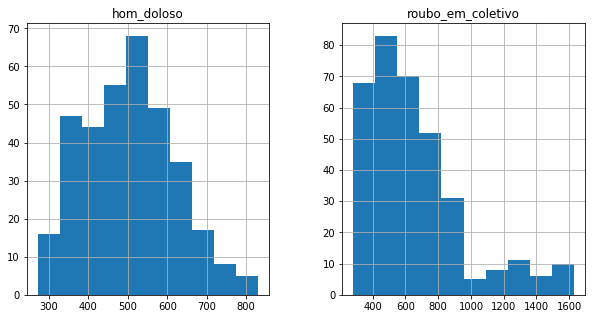

In [24]:
df[['hom_doloso','roubo_em_coletivo']].hist(bins = 10, figsize=(10,5));

> Analisando o histograma da feature hom_doloso podemos ver que houve 68 meses em que tivemos um índice de aproximadamente 520 homicidios dolosos, o que representa a nossa moda como valor mais ocorrente, mostrando assim ser um valor muito alto, fazendo contas rapidas são mais do que 15 mortes por dia no estado.

>Agora analisando o histograma de variável roubo_em_coletivo temos uma moda de 500 casos por mês em 80 dos meses. Porém se levarmos em conta a média de 659 casos por mês, temos quase 22 roubos por dia em transportes coletivos.

#Conclusão
> Como nossa hipótese nos dizia o Estado do Rio de Janeiro é muito perigoso e existem muitas ocorrências todos os dias. Na feature sobre roubos e furtos de veiculos percebe-se que existem muitos casos e a maioria deles não solucionados uma vez que apenas uma media de 42% dos veiculos foram recuperados no periodo avaliado. Pode-se concluir também que é um local muito perigoso para proprietários de veiculos uma vez que a média de roubos é de 4100 por mês, sendo mais de 136 casos por dia de roubo ou furto de veiculos. 

>Passando para a feature sobre homicidio doloso( Quando à intenção de matar) constata-se que os casos são recorrentes todos os dias no estado com uma media de mais de 15 homicidios por dia, totalizando uma média de mais de 500 por mês, dessa forma também comprovando a hipótese de que o estado é de fato violento.

> Por último mas não menos importante analisando os dados sobre o transporte público do Rio de Janeiro, podemos observar que não é um meio seguro de locomoção já que ocorrem por dia cerca de 22 roubos por dias.

>Para concluir podemos confirmar nossa hipótese analisando essas 3 feautes de que o estado de Rio de Janeiro como um estado violento com altos indices de criminalidade nas variáveis estudadas.